In [ ]:
%pip install jupyter pandas sympy
%pip install beautifulsoup4 lxml html5lib
%pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 4.5 MB/s eta 0:00:00


In [ ]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

In [ ]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [ ]:
from modsim import *

In [ ]:
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/data/World_population_estimates.html')

Downloaded World_population_estimates.html


In [ ]:
from pandas import read_html

In [ ]:
filename = 'World_population_estimates.html'
tables = read_html(filename,
                   header=0,
                   index_col=0,
                   decimal='M')

In [ ]:
table2 = tables[2]

In [ ]:
table2.head()

,United States Census Bureau (2017)[28],Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2007)[24],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
table2.columns = ['census', 'prb', 'un', 'maddison',
                  'hyde', 'tanton', 'biraben', 'mj',
                  'thomlinson', 'durand', 'clark']

In [ ]:
census = table2.census / 1e9

In [ ]:
census.tail()

Year
2012    7.013871
2013    7.092128
2014    7.169968
2015    7.247893
2016    7.325997
Name: census, dtype: float64

In [ ]:
un = table2.un / 1e9
un.tail()

Year
2012    7.080072
2013    7.162119
2014    7.243784
2015    7.349472
2016         NaN
Name: un, dtype: float64

In [ ]:
def plot_estimates():
    census.plot(style=':', label='US Census')
    un.plot(style='--', label='UN DESA')
    decorate(xlabel='Year',
             ylabel='World population (billions)')

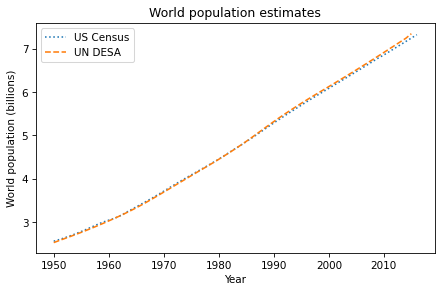

In [ ]:
plot_estimates()
decorate(title='World population estimates')

In [ ]:
from numpy import abs

In [ ]:
abs_error = abs(un - census)
abs_error.tail()

Year
2012    0.066201
2013    0.069991
2014    0.073816
2015    0.101579
2016         NaN
dtype: float64

In [ ]:
from numpy import mean

mean(abs_error)

0.029034508242424265

In [ ]:
from numpy import max

max(abs_error)

0.10157921199999986

In [ ]:
rel_error = 100 * abs_error / census
rel_error.tail()

Year
2012    0.943860
2013    0.986888
2014    1.029514
2015    1.401500
2016         NaN
dtype: float64

In [ ]:
mean(rel_error)

0.5946585816022846

In [ ]:
census[1950]

2.557628654

In [ ]:
total_growth = census[2016] - census[1950]

In [ ]:
t_0 = census.index[0]
t_0

1950

In [ ]:
t_end = census.index[-1]
t_end

2016

In [ ]:
elapsed_time = t_end - t_0
elapsed_time

66

In [ ]:
p_0 = census[t_0]
p_end = census[t_end]

In [ ]:
total_growth = p_end - p_0
total_growth

4.768368055

In [ ]:
annual_growth = total_growth / elapsed_time
annual_growth

0.07224800083333333

In [ ]:
results = TimeSeries()

In [ ]:
results[t_0] = p_0

In [ ]:
show(results)

,Quantity
Time,
1950,2.557629


In [ ]:
for t in range(t_0, t_end):
    results[t+1] = results[t] + annual_growth

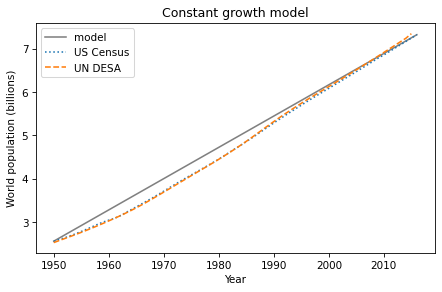

In [ ]:
results.plot(color='gray', label='model')
plot_estimates()
decorate(title='Constant growth model')

In [ ]:
t_0 = census.index[0]
t_end = census.index[-1]
elapsed_time = t_end - t_0

p_0 = census[t_0]
p_end = census[t_end]

total_growth = p_end - p_0
annual_growth = total_growth / elapsed_time

results = TimeSeries()
results[t_0] = p_0

for t in range(t_0, t_end):
    results[t+1] = results[t] + annual_growth

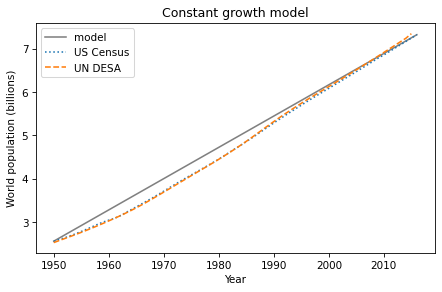

In [ ]:
results.plot(color='gray', label='model')
plot_estimates()
decorate(title='Constant growth model')

Exercise 1
Try fitting the model using data from 1970 to the present, and see if that does a better job.

Suggestions:

Define t_1 to be 1970 and p_1 to be the population in 1970. Use t_1 and p_1 to compute annual growth, but use t_0 and p_0 to run the simulation.

You might want to add a constant to the starting value to match the data better.

In [ ]:
t_0 = census.index[0]
t_1 = 1970
t_end = census.index[-1]
elapsed_time = t_end - t_1

p_0 = census[t_0]
p_1 = census[t_1]
p_end = census[t_end]

total_growth = p_end - p_1
annual_growth = total_growth / elapsed_time
annual_growth

0.07854997754347826

In [ ]:
results = TimeSeries()
results[t_0] = p_0 - 0.45

for t in range(t_0, t_end):
    results[t+1] = results[t] + annual_growth

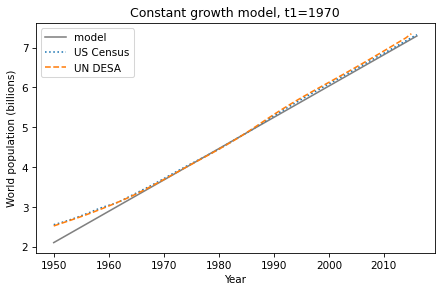

In [ ]:
results.plot(color='gray', label='model')
plot_estimates()
decorate(title='Constant growth model, t1=1970')